## Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.<br>
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.<br>
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.<br>
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.<br>
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.<br>
You should:<br>
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

## Description of the data
The dataset includes the following fields:<br>
- 'Churn' — the fact of churn for the month in question
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

#### Table of Contents
#### Step 1.
- [Download the data](#Open)

#### Step 2. Carry out exploratory data analysis (EDA)
- [Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method)](#Study-the-dataset)
- [Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method)](#Mean-feature-values)
- [Plot bar histograms and feature distributions for those who left (churn) and those who stayed](#Plot-bar-histograms)
- [Build a correlation matrix and display it](#Correlation-matrix)

#### Step 3. Build a model to predict user churn
- [Build a binary classification model for customers where the target feature is the user's leaving next month.
Divide the data into train and validation sets using the train_test_split() function](#Divide-the-data)
- [Train the model on the train set with two methods: logistic regression and random forest](#Two-methods)
- [Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?](#Metrics)

#### Step 4. Create user clusters
- [Set aside the column with data on churn and identify object (user) clusters. Standardize the data](#Standardize-the-data)
- [Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Use the resulting graph to estimate the number of clusters you can single out](#Build-a-matrix-of-distances)
- [Train the clustering model with the K-means algorithm and predict customer clusters (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students)](#K-means-algorithm)
- [Look at the mean feature values for clusters. Does anything catch your eye?](#Mean-feature-values2)
- [Plot distributions of features for the clusters. Do you notice anything?](#Distributions-of-features)
- [Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?](#Churn-rate-for-each-cluster)

#### Step 5. Come up with conclusions and basic recommendations on working with customers
- [Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention](#Conclusion)

<a id='Open'></a>

**Download the data**

In [1]:
# importing libraries
import pandas as pd
import scipy.stats as st
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score
from sklearn.metrics import silhouette_samples, balanced_accuracy_score
!pip install statsmodels
!pip install "notebook>=5.3" "ipywidgets>=7.2"

In [2]:
LOCAL_PATH = 'C:/Users/anna/Desktop/Y-data/Course9 Forecasts and Predictions/gym_churn_us.csv'
PLATFORM_PATH = '/datasets/gym_churn_us.csv'
try:
    df = pd.read_csv(LOCAL_PATH)
except:
    df = pd.read_csv(PLATFORM_PATH)
    
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id='Study-the-dataset'></a>

**Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method**

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

There're no missing values.

I'll convert column names to lowercase for the purpose of convenience.

In [4]:
df.columns = [x.lower() for x in df.columns.to_list()]

In [5]:
df.sample(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1312,0,1,0,0,1,1,0,24,159.912777,1.0,15,0.957916,0.846683,0
758,1,1,0,0,1,12,1,31,170.027707,9.0,2,3.723757,3.689265,0
1469,1,1,0,0,1,1,1,30,226.744335,1.0,1,1.905820,2.047298,0
3023,0,1,1,1,1,6,0,26,20.202207,6.0,4,2.337851,2.261127,0
2474,1,1,0,0,1,1,0,29,55.894550,1.0,1,1.605178,0.665334,1
1873,1,1,0,0,1,6,0,29,147.674719,6.0,7,1.109065,1.057100,0
2792,0,1,0,1,1,1,0,26,8.610060,1.0,3,2.547886,2.594623,0
1276,0,1,0,0,0,1,0,26,316.775266,1.0,1,1.886832,1.887549,0
2108,0,0,1,1,1,1,0,31,224.456911,1.0,1,0.887009,0.747967,0
2814,0,1,1,1,1,12,1,34,35.893532,12.0,6,2.657564,2.559249,0


I'll check if dataset contains dublicates.

In [6]:
df.duplicated().sum()

0

There're no dublicates.

Next, I'll convert months remaining before contract expiration from float to integer data type.

In [7]:
df.month_to_end_contract = df.month_to_end_contract.astype('int')
set(df.month_to_end_contract)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

I'll check if there any suspicious pattern in clients attendance, since those rows contain zeros and affects future analytics.

In [8]:
zero_frq = df[(df['avg_class_frequency_total'] == 0)&(df['avg_class_frequency_current_month'] != 0)].gender.count()
zero_frq

29

I found that 29 users have 0 value in column [average frequency of visits per week over the customer's lifetime], but non zero values  in [average frequency of visits per week over the preceding month]. It looks like an error, but I'll not drop these rows, because these customers visited gym in the preceding month.

Next step is to analyze means and std.

In [9]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


According to the data description:
- there're approximately the same number of men and women in the gym. 
- 84,5% of customers live near with the gym. Most customers buy membership for a period of 3 to 6 months. 
- 40% of customers take part in group sessions. Average age of visitors 29 years old. 
- Average amount of money spent on other gym services 136$. 
- Customers visit gym 2 times a week. 
- Average churn rate is 26%.

<a id='Mean-feature-values'></a>

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method.**

In [10]:
churn = df.groupby('churn').mean()
churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


When I look at the data related to customers, who left the gym, I see following patterns:

1. They have low involvement into partners programs and even more rare they are being invited to the gym via "promo friend" program.
2. They have contract period from 1 till 6 month.
3. They rare visitors of group gym classes.
4. They yonger than loyal group: 27 years vs 30 years.
5. They have shorter period till end date of the membership contract: 1,6 month vs 5,2
6. They visit gym less often than loyal clients.

<a id='Plot-bar-histograms'></a>

**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

Let's plot histograms.

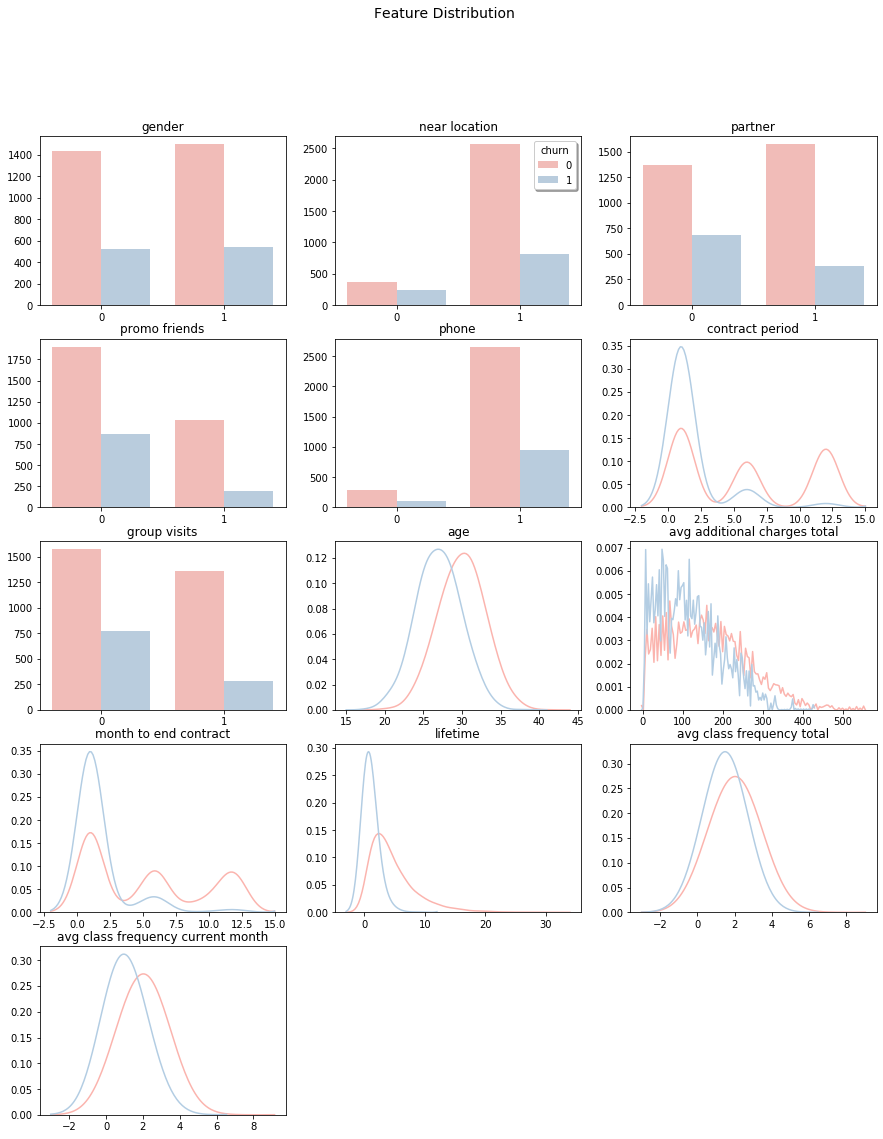

In [11]:
sns.set_palette('Pastel1')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(df.drop('churn', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if df[column].unique().sum() == 1:
        sns.countplot(x=column, hue='churn', data=df)
        plt.xlabel('')
        plt.ylabel('')
        plt.gca().get_legend().remove()
        if column == 'near_location':
            legend = df['churn'].unique()
            plt.legend(legend, shadow=True, fancybox=True, title='churn', loc='best')
    if df[column].unique().sum() > 1:
        sns.distplot(df[df['churn'] == 0][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        sns.distplot(df[df['churn'] == 1][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Feature Distribution', fontsize = 14)
#plt.tight_layout()
plt.show()

The graphs confirm the findings written in the section above. 
Dataset dosen't contain outliers and distributions are normal.

Now I'll plott barplot for churn rate column

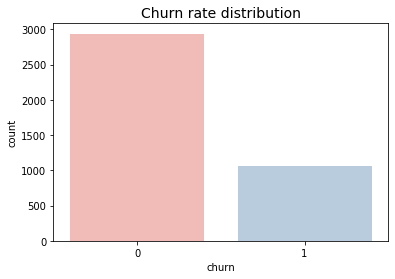

In [12]:
ax=sns.countplot(x='churn', data=df)
ax.set_title('Churn rate distribution', fontsize = 14);

Churn rate distrubution shows that the share loyal clients is 3 times bigger than those clients who left.

<a id='Correlation-matrix'></a>

**Build a correlation matrix and display it**

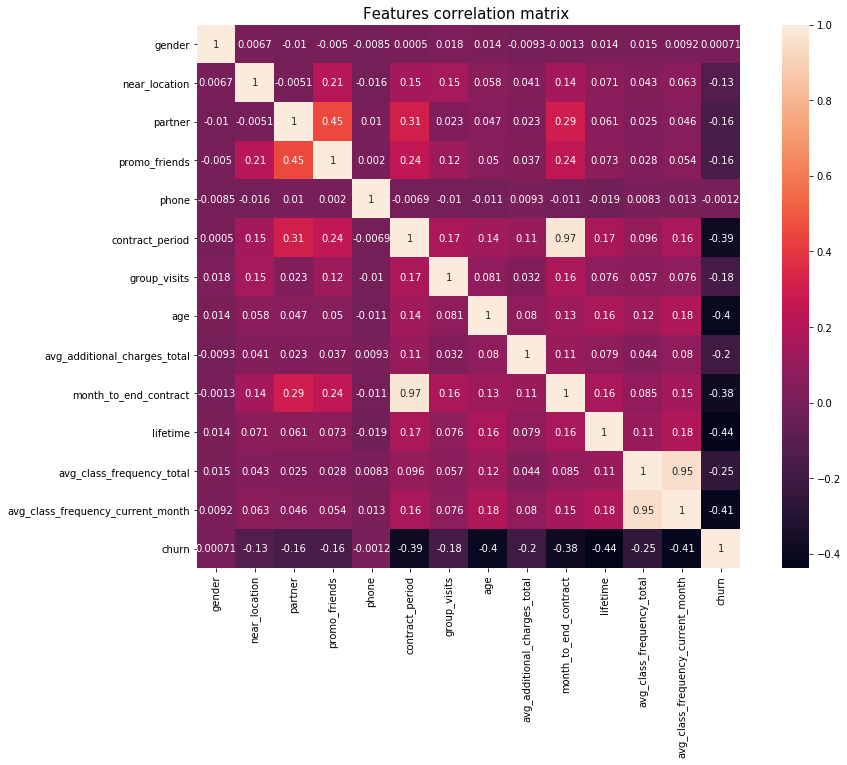

In [13]:
# correlation matrix
cm = df.corr() 

plt.figure(figsize=(15,10))
ax = sns.heatmap(cm, annot = True, square=True) 
ax.set_title('Features correlation matrix ', fontsize=15)
plt.show()

Conclusions:
1. There're no features that have the strongest correlation with the target variable: no results with a high correlation.
2. There're two pairs with strong correlation. First: avg_class_frequency_total and avg_class_frequency_current_month = 0.95. Second: contract_period and month_to_end_contract = 0.97.

<a id='Divide-the-data'></a>

**Build a binary classification model for customers where the target feature is the user's leaving next month. Divide the data into train and validation sets using the train_test_split() function**

I'll divide the data into features (the X matrix) and a target variable (y).

In [14]:
X = df.drop('churn', axis = 1)
y = df['churn']

Next, I'll split the data on train and test sets. Due to the fact that the labels of the target variable are not balanced, I need ensure the proportion between the training and test samples. For this purpose I'll use stratification splitting. I choose 80/20 split.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<a id='Two-methods'></a>

**Train the model on the train set with two methods: logistic regression and random forest**

I'll to standardize the data and train StandardScaler on the train set.

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Define the model's algorithm and train the model

In [17]:
lr_model = LogisticRegression() 
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Use the trained model to make forecasts.

In [18]:
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

Next I'll define the algorithm for the random forest model and train the random forest model.

In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Use the trained model to make predictions.

In [20]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Now I'll define the algorithm for the gradient boosting model.

In [21]:
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]

In order to compare binary classification models, I will  take gradient boosting model model into account as well.

<a id='Metrics'></a>

**Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?**

Let's define a function and output the metrics: logistic regression, random forest and gradient boosting.

In [22]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    
# print all metrics for logistic regression
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
# print all metrics for random forest
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')
# print all metrics for gradient boosting
print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Metrics for gradient boosting:')

Metrics for logistic regression:
	Accuracy: 0.92
	Balanced accuracy: 0.89
	Precision: 0.89
	Recall: 0.81
	F1: 0.85
	ROC_AUC: 0.97
Metrics for random forest:
	Accuracy: 0.92
	Balanced accuracy: 0.89
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97
Metrics for gradient boosting:
	Accuracy: 0.94
	Balanced accuracy: 0.91
	Precision: 0.92
	Recall: 0.84
	F1: 0.88
	ROC_AUC: 0.98


Conclusions:
1. Gradient boosting model shows the best results.
2. Random forest shows the lowes results comparing to other models. But in general they are also good.

<a id='Standardize-the-data'></a>

**Standardize the data**

I'll creat a scaler class object (normalizer)

In [23]:
X = df.drop('churn', axis = 1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)

The obligatory standardization of data is completed. Now I can passing it to the algorithm.

<a id='Build-a-matrix-of-distances'></a>

**Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Use the resulting graph to estimate the number of clusters you can single out.**

I'll put the table with the linked bundles of objects to variable linked and plot a dendrogram.

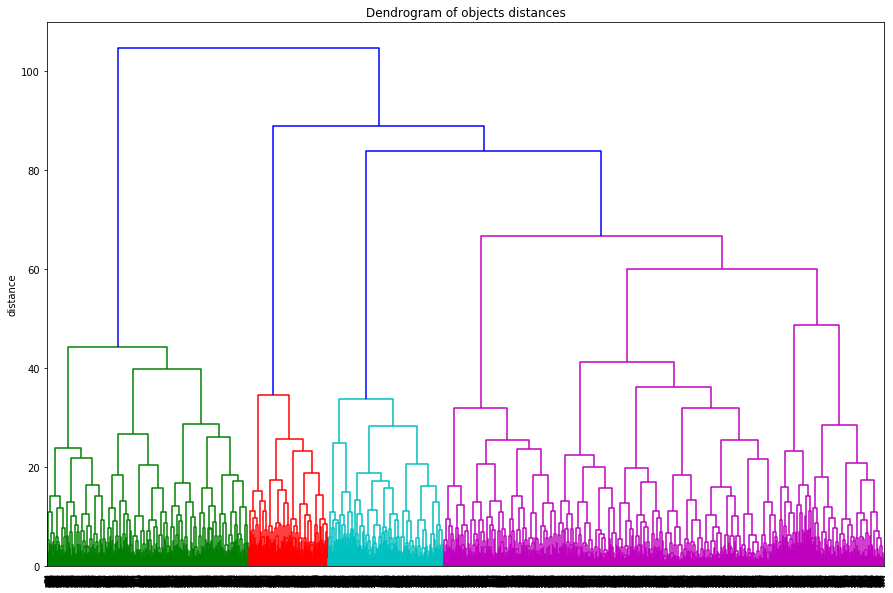

In [24]:
linked = linkage(X_sc, method = 'ward', metric = 'euclidean') 

# calculate full dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           )
plt.title('Dendrogram of objects distances')
plt.ylabel('distance')
plt.show()

The dendrogram returns 4 clusters. I'll use 5 clusters in the futher analysis since we are asked to use 5 for easier comparison of the results with all other students.

<a id='K-means-algorithm'></a>

**Train the clustering model with the K-means algorithm and predict customer clusters (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students)**

As was defined above, I'll set 5 clusters.

In [25]:
km = KMeans(n_clusters = 5, random_state=0)

Next I'll apply the algorithm to the data and form a cluster vector 

In [26]:
labels = km.fit_predict(X_sc)

In [27]:
df['cluster_km'] = labels

We applied K-means algorithm to our data, let's look at clusters.

<a id='Mean-feature-values2'></a>

**Look at the mean feature values for clusters. Does anything catch your eye?**

Let's print the statistics of the mean feature values per cluster.

In [28]:
df.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,1,0.480300,0.812383,0.000000,0.086304,1.000000,1.863039,0.324578,28.136961,131.299377,1.787992,2.346154,1.325794,1.086387,0.550657
2,2,0.560096,0.858173,0.337740,0.197115,0.998798,2.734375,0.449519,30.204327,164.628354,2.522837,5.007212,2.926304,2.932554,0.048077
3,3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


In the table with average values, we can find distinctive features for each cluster. 
- Zero cluster has tendency to be in the meadle of all features. It dosen't have any pieack or falls in feature results and shows nither low, not hight churn rate.
- **1st class** has 0 in partner column. Has shortest contract period and shortest lifetime. It also shows the **hiest churn rate**.
- 2nd cluster shows interest in group visits and in partners program. It also has the hiest average group age - more than 30 years and longest lifetime: 5 month, plus hiest gym frequency visiting ~3 times.
- 3-rd cluster are clients with short contract period and lowest avg_additional_charges_total. They also have low avg_class_frequency_total and leave far from gym.
- **4th cluster** located near with the gym, has the longest contract period = 11.3 and month to end contract = 10. Hight avg additional charges = 164.5. It also shows the hiest interest in the group visits and partner columns. And it shows the **lowest churn rate**.

<a id='Distributions-of-features'></a>

**Plot distributions of features for the clusters. Do you notice anything?**

Let's build a plot.

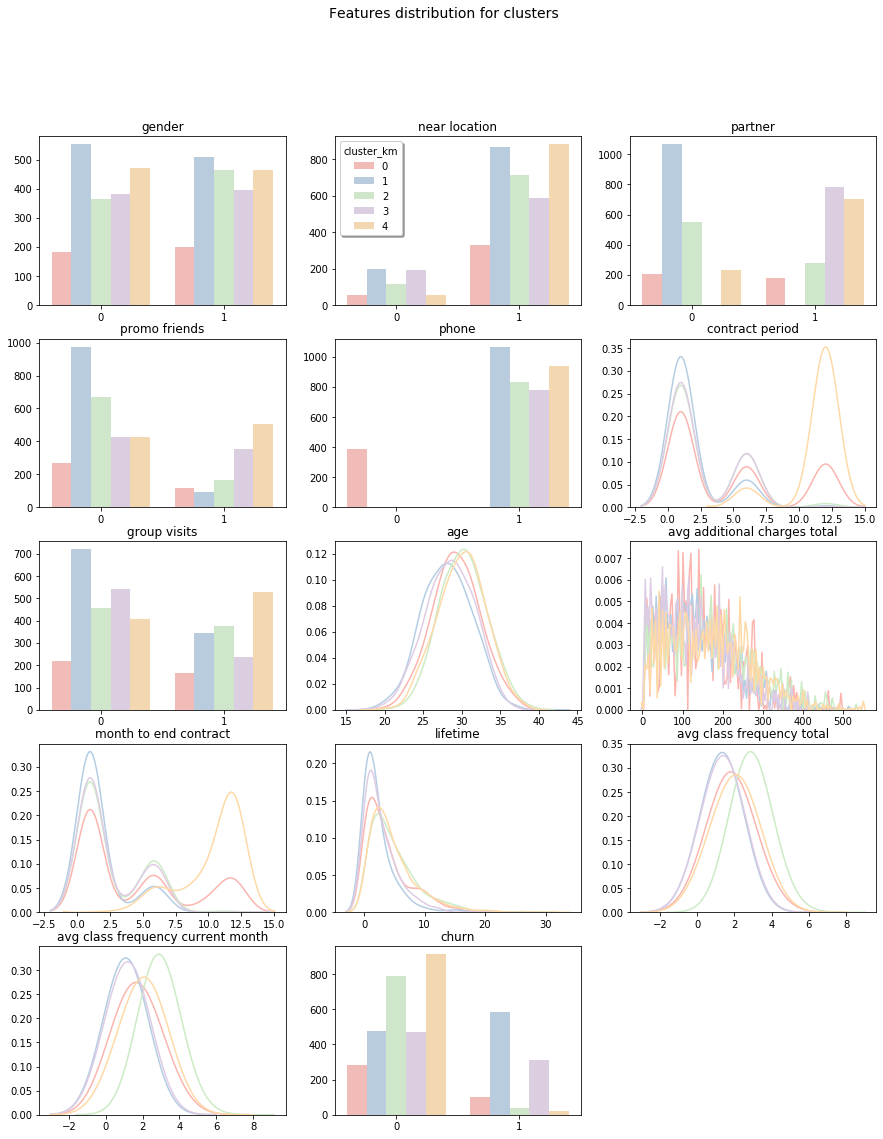

In [29]:
sns.set_palette('Pastel1')
plt.figure(figsize=(15,18))
the_grid = GridSpec(5, 3)
for i,column in enumerate(df.drop('cluster_km', axis=1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    if df[column].unique().sum() == 1:
        sns.countplot(x=column, hue='cluster_km', data=df)
        plt.xlabel('')
        plt.ylabel('')
        plt.gca().get_legend().remove()
        if column == 'near_location':
            legend = sorted(df['cluster_km'].unique())
            plt.legend(legend, shadow=True, fancybox=True, title='cluster_km', loc='best')
           
    if df[column].unique().sum() > 1:
        sns.distplot(df[df['cluster_km'] == 0][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        sns.distplot(df[df['cluster_km'] == 1][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        sns.distplot(df[df['cluster_km'] == 2][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        sns.distplot(df[df['cluster_km'] == 3][column], hist = False, kde = True, kde_kws = {'bw' : 1})
        sns.distplot(df[df['cluster_km'] == 4][column], hist = False, kde = True, kde_kws = {'bw' : 1})

        plt.xlabel('')
        plt.ylabel('')

plt.suptitle('Features distribution for clusters', fontsize = 14)
plt.show()

Conclusions:
1. Such features as [gender], [age], [avg_additional_charges_total] return almost the same results for all clusters.
2. 1-st cluster with the highest churn rate, has such features as: low frequency in visiting gym, less often than others join the gym via partners and promo friends program, have lowest interest in the group sessions.
3. 4-th cluster with the lowest churn rate on opposite has the highest index in feature 'partner', has longer contract term and often joins group sessions.

<a id='Churn-rate-for-each-cluster'></a>

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

In [32]:
df_grp = ((df.groupby(['cluster_km'])['churn'].mean()*100).round(2).astype(str)+'%').reset_index()
df_grp

,cluster_km,churn
0,0,26.75%
1,1,55.07%
2,2,4.81%
3,3,39.56%
4,4,2.35%


According to the analisys the 1-st cluster have the hiest churn rate 55%. The 4-th cluster shows lowest churn rate 2.35% and loyalty.
Let's additionally evaluate the quality of K-means algorithm. For this I'll calculate silhouette score.

In [31]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.12


Silhouette_score is relatively low and this means that our 5 clusters are not clearly distinguished groups.

<a id='Conclusion'></a>

**Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.**

**After analysing the data of Model Fitness Gym cliens, I found some data insight and patterns, which could help with the strategy for customer interaction and retention.**

**The features of the most loyal gym client are:**
1. He lives near with a gym
2. Often joins via affiliates or friend program.
3. Has long (more than 5 months) contract period.
4. Likes group visits.

**The features of the least loyal gym client are:**
1. He lives far from a gym
2. Rarely joins via affiliates or friend program.
3. Has short contract period.
4. Rarely attends group visits.


**According to gathered statistics the management of Gym could use fllowing recommendation in order in increase retention and decrese the churn rate:**

1. Boost incentivise scheme for affiliates and "bring friend" programs.
2. Change the contact terms and conditions in that way that clients would prefer to sigh the long term contracts more than short term ones. For example, make discount for contract over 6 and 12 months.
3. Make group gym exercises avaliable and interesting for every client. Analize what kind of group activities could be added and what kind are the most popular. Perhabs, consider hiring the charizmatic trainer, that will attract more clients into group exersises.